# Data Wrangling

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as pyoff 
import plotly.express as px

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

**Load Data**

In [2]:
cc = pd.read_csv('data/CC GENERAL.csv')

In [3]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Immediately, we see that there are null values for `MINIMUM PAYMENTS` and one null value for `CREDIT LIMIT`

In [4]:
cc.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

In [5]:
cc.set_index('CUST_ID', inplace=True)

## Missing Values

In [6]:
pd.concat([cc.isnull().sum(), cc.isnull().mean() * 100], 
          keys=['count', '% of instances'], axis=1).sort_values(by=['count'], ascending=False)

count  % of instances
MINIMUM_PAYMENTS                    313        3.497207
CREDIT_LIMIT                          1        0.011173
BALANCE                               0        0.000000
CASH_ADVANCE_FREQUENCY                0        0.000000
PRC_FULL_PAYMENT                      0        0.000000
PAYMENTS                              0        0.000000
PURCHASES_TRX                         0        0.000000
CASH_ADVANCE_TRX                      0        0.000000
PURCHASES_INSTALLMENTS_FREQUENCY      0        0.000000
BALANCE_FREQUENCY                     0        0.000000
ONEOFF_PURCHASES_FREQUENCY            0        0.000000
PURCHASES_FREQUENCY                   0        0.000000
CASH_ADVANCE                          0        0.000000
INSTALLMENTS_PURCHASES                0        0.000000
ONEOFF_PURCHASES                      0        0.000000
PURCHASES                             0        0.000000
TENURE                                0        0.000000

**Minimum Payments**

In [7]:
cc[cc['MINIMUM_PAYMENTS'].isnull()].head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10004   1666.670542           0.636364     1499.0            1499.0   
C10047   2242.311686           1.000000      437.0              97.0   
C10049   3910.111237           1.000000        0.0               0.0   
C10056      6.660517           0.636364      310.0               0.0   
C10057   1311.995984           1.000000     1283.9            1283.9   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10004                      0.0    205.788017             0.083333   
C10047                    340.0    184.648692             0.333333   
C10049                      0.0   1980.873201             0.000000   
C10056                    310.0      0.000000             0.666667   
C10057                      0.0      0.000000             0.250000   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10004                     0.083333                          0.000000   
C10047                     0.083333                          0.333333   
C10049                     0.000000                          0.000000   
C10056                     0.000000                          0.666667   
C10057                     0.250000                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10004                 0.083333                 1              1   
C10047                 0.166667                 2              5   
C10049                 0.500000                 7              0   
C10056                 0.000000                 0              8   
C10057                 0.000000                 0              6   

         CREDIT_LIMIT    PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                        
C10004         7500.0    0.000000               NaN               0.0      12  
C10047         2400.0    0.000000               NaN               0.0      12  
C10049         4200.0    0.000000               NaN               0.0      12  
C10056         1000.0  417.016763               NaN               0.0      12  
C10057         6000.0    0.000000               NaN               0.0      12

It appears that for rows with NaN values in the MINIMUM_PAYMENTS column, the PAYMENTS column tends to have zero. Let's check with the  value_counts() method

In [8]:
cc[cc['MINIMUM_PAYMENTS'].isnull()]['PAYMENTS'].value_counts()

0.000000       240
129.905883       1
165.763083       1
1081.831337      1
319.172687       1
              ... 
1159.135064      1
197.845282       1
9821.138115      1
415.603589       1
363.735397       1
Name: PAYMENTS, Length: 74, dtype: int64

Indeed most of the customers with NaN values for MINIMUM_PAYMENTS also have zero. This makes sense as for the most part minimum payments should be equal to or less than payments. MINIMUM_PAYMENTS should be a derivation of PAYMENTS. Thus, we can use the PAYMENTS values as a proxy for the null values in MINIMUM_PAYMENTS. 

In [9]:
cc['MINIMUM_PAYMENTS'].fillna(cc['PAYMENTS'], inplace=True)

**CREDIT_LIMIT**

Replace the one missing value in CREDIT_LIMIT with the median

In [10]:
cc[cc['CREDIT_LIMIT'].isnull()]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                              
C15349   18.400472           0.166667        0.0               0.0   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C15349                      0.0    186.853063                  0.0   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C15349                          0.0                               0.0   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C15349                 0.166667                 1              0   

         CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                      
C15349            NaN  9.040017         14.418723               0.0       6

In [11]:
cc['CREDIT_LIMIT'].fillna(cc['CREDIT_LIMIT'].median(), inplace=True)

In [12]:
cc.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Exploratory Data Analysis

In [13]:
cc.describe().T

count         mean          std   min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.0   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.0   
PURCHASES                         8950.0  1003.204834  2136.634782   0.0   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.0   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.0   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.0   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.0   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.0   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.0   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.0   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.0   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.0   
CREDIT_LIMIT                      8950.0  4494.282473  3638.646702  50.0   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.0   
MINIMUM_PAYMENTS                  8950.0   845.254467  2362.317578   0.0   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.0   
TENURE                            8950.0    11.517318     1.338331   6.0   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   164.378505   295.620356   794.573294   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

**Histograms**

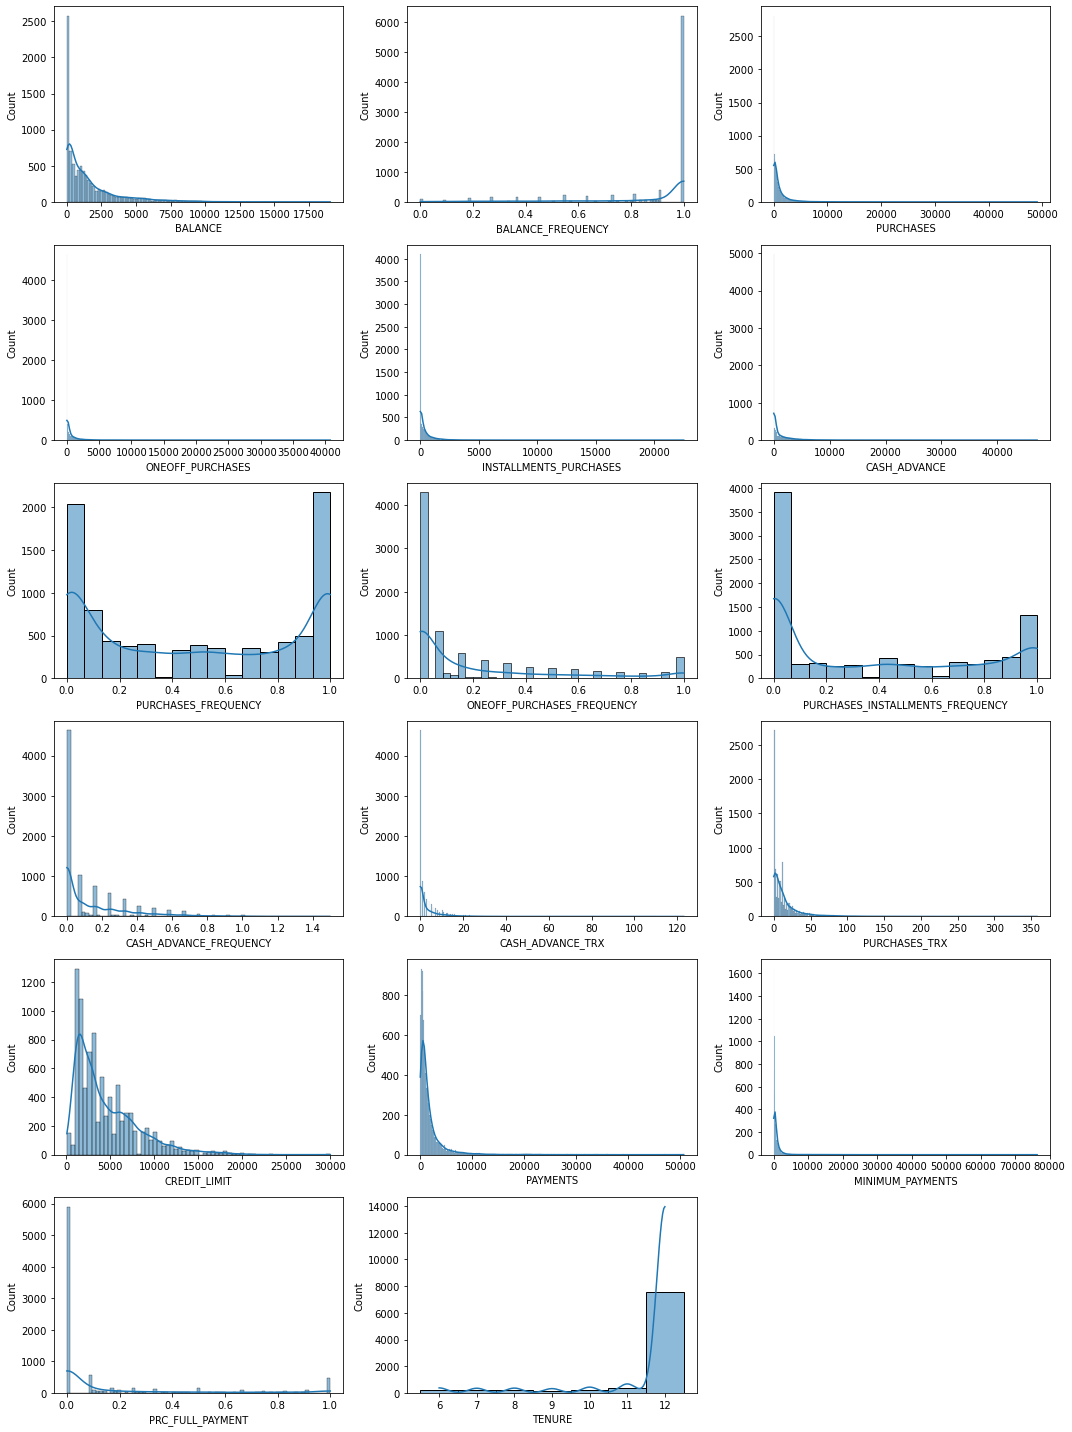

In [14]:
fig = plt.figure(figsize=(15, 20))

for i, col in enumerate(cc.columns):
    plt.subplot(6, 3, i+1)
    if col == 'TENURE':
        sns.histplot(cc[col], kde=True, discrete=True)
    else:
        sns.histplot(cc[col], kde=True)    

plt.tight_layout()

Of immediate note, is that most of our variable distributions are severely right skewed. The exceptions are `Balance FREQUENCY` AND `TENURE`, which are left skewed. As well as `PURCHASES_FREQUENCY`, which exhibits a bimodal distribution. High Kurtosis in the credit card data is expected as only a few people might exhibit extreme spending habits or usage. For example, the average person will never or rarely use cash in advance due to the high interest rates while others due to their circumstances will. Thus, it makes sense that `CASH_ADVANCE` and `CASH_ADVANCE_FREQUENCY` have heavily right-skewed distributions. During the modeling phase, we can also possibly drop `TENURE` as almost all the values are 12; we would not receive any new information.

**Boxplots**

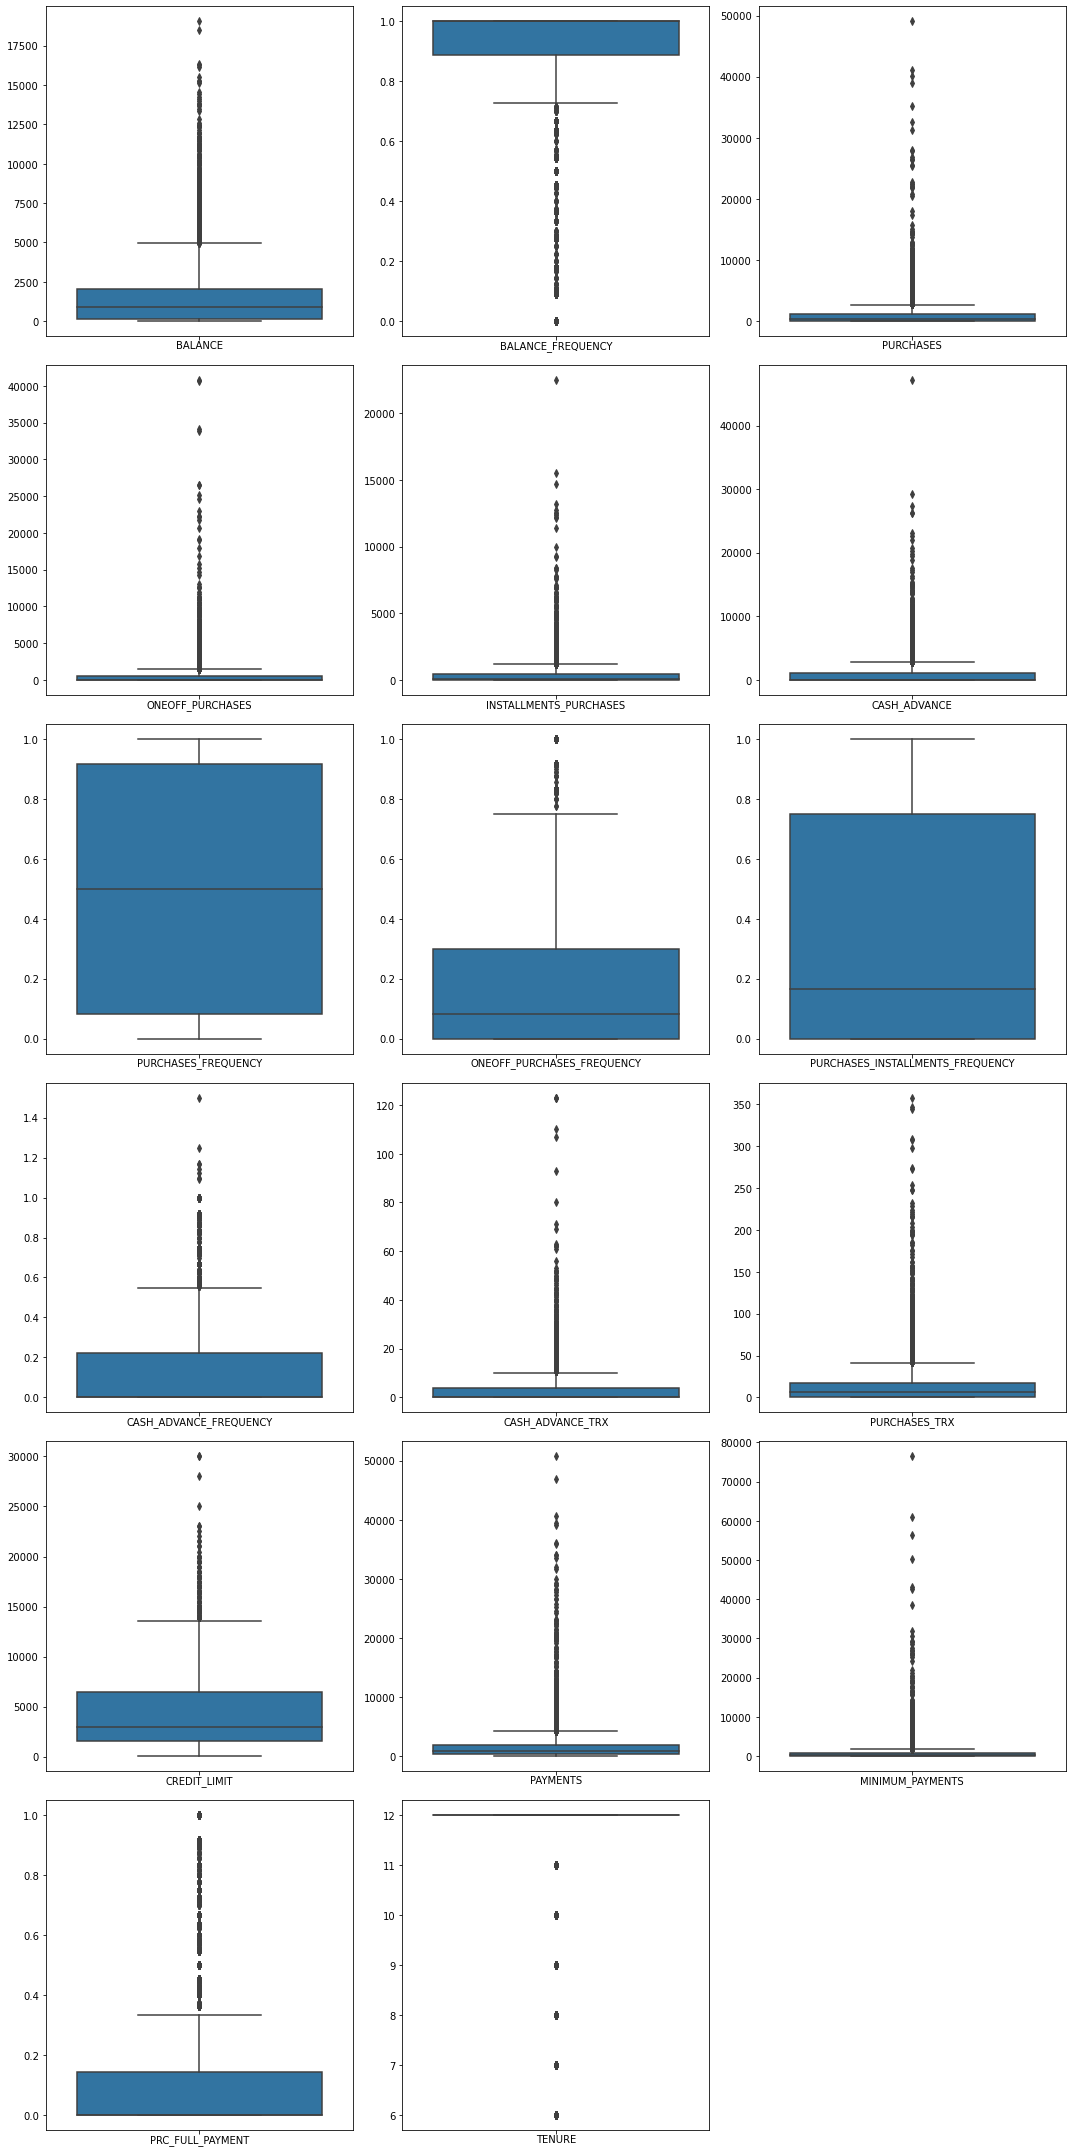

In [15]:
fig = plt.figure(figsize=(15, 30))

for i, col in enumerate(cc.columns):
    plt.subplot(6, 3, i+1)
    plot = sns.boxplot(data=cc[col])
    plt.tick_params(axis='x', labelbottom=False)
    plt.xlabel(col)

    
fig.tight_layout()
plt.show()

The boxplots confirm that the data indeed has many outliers. For almost every variable, there are quite a few data points that lie outside the whiskers, which are the range of values above the `Q3 + 1.5*IQR` or below `Q1 - 1.5*IQR`. The boxplots also further show the concentration of values. In some cases, the median and Q1 are the exact same.

**What is the relationship between the # of transactions made and purchases/cashadvance?**


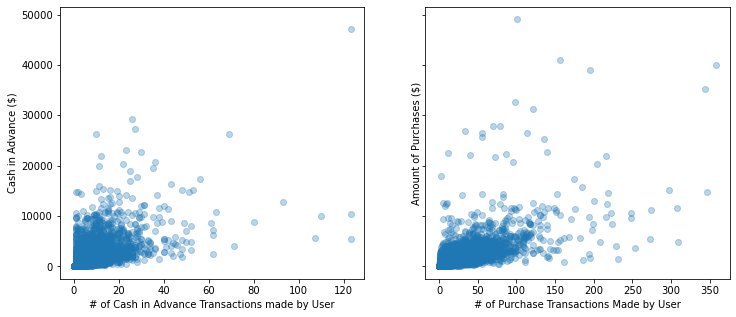

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12, 5], sharey=True)
ax1.scatter(cc['CASH_ADVANCE_TRX'], cc['CASH_ADVANCE'], alpha=.3)
ax1.set_xlabel('# of Cash in Advance Transactions made by User')
ax1.set_ylabel('Cash in Advance ($)')
ax2.scatter(cc['PURCHASES_TRX'], cc['PURCHASES'], alpha=.3)
ax2.set_xlabel('# of Purchase Transactions Made by User')
ax2.set_ylabel("Amount of Purchases ($)")
#plt.savefig('graphs/Transactions vs amount', dpi=300)
plt.show()

The scatterplots show that most credit card users generally cluster around the lower to mid level in their number of transactions and total dollars spent. There are a few customers who made an abnormal amount of cash in advance transactions, with only one of them given almost \\$50,000. Usually, we would want to further explore this anomaly as this could be a user who is likely to default on payments,  or it could be an error in our data; however, this is beyond the scope of this project. Other than these anomalies, most of the data points for cash in advance transactions per user range between 0 to 40 and the amount of cash given ranges from \\$0 - \\$10,000, indicating that credit card users try to not use this service--most likely this is because of the fees and interest associated with using cash in advance. On the other hand, for purchases, the range of transactions ranges from 0 to 150 and also has more outliers, revealing that spending habits, though still concentrated, are more spread out than cash in advance users.

**Credit Utilization Ratio**

Credit utilization ratio is a common metric used by credit card companies to determine a user's credit score. It is calculated by taking the balance / credit limit.

In [17]:
# Credit utilization ratio/rate is how much you owe / credit limit 
cc['cc_utilization'] = cc['BALANCE'] / cc['CREDIT_LIMIT'] * 100

# qcut creates equal sized buckets
cc['cc_utilization_tile'] = pd.qcut(cc['cc_utilization'], q=10, precision=1)

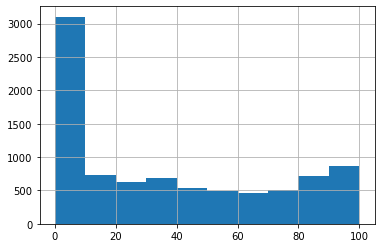

In [18]:
cc[cc['cc_utilization']<=100]['cc_utilization'].hist()


In [19]:
cc['cc_utilization'].median()

30.272032975000002

**What isthe relationship between Credit Card Utilization and Purchases**

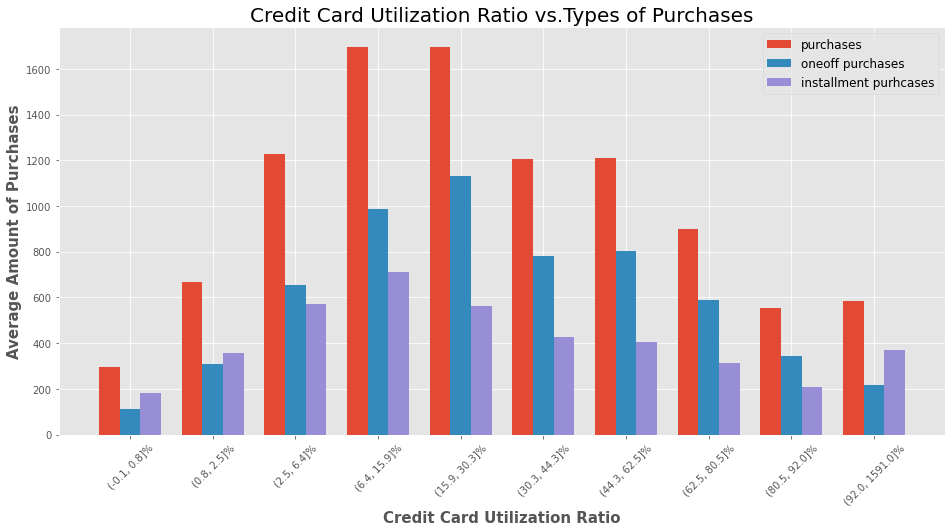

In [20]:
plt.style.use('ggplot')

chart_df = cc.groupby('cc_utilization_tile', as_index=False).mean()[['cc_utilization_tile','PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']]

label_x = chart_df['cc_utilization_tile'].astype(str) +'%'
index = np.arange(len(label_x))
width = 0.25
fig, ax = plt.subplots(figsize=[13.33, 7.5])

bar1 = ax.bar(index+0.0, chart_df['PURCHASES'], width, label= 'purchases')
bar2 = ax.bar(index+ 0.25, chart_df['ONEOFF_PURCHASES'], width, label='oneoff purchases')
bar3 = ax.bar(index+ 0.5, chart_df['INSTALLMENTS_PURCHASES'], width, label='installment purhcases')

plt.xlabel('Credit Card Utilization Ratio', fontsize = 15, fontweight='bold')
plt.ylabel('Average Amount of Purchases', fontsize = 15, fontweight='bold')
plt.title('Credit Card Utilization Ratio vs.Types of Purchases', fontsize=20)
plt.xticks(index+width, labels=label_x, rotation=45)
plt.legend(fontsize=12)

plt.tight_layout()
#plt.savefig('graphs/cc utilization vs purchases', dpi=300)
plt.show()

Users with credit card utilization ratios between 6 and 30% percent have the highest overall average purchases. These users are also close to our average utilization. 

Notably, on both ends of the extremes (below 2.5%, and above 92% utilization), the average amount of installment purchases exceed the one-off purchases.

**What isthe relationship between Credit Card Utilization and Payments**

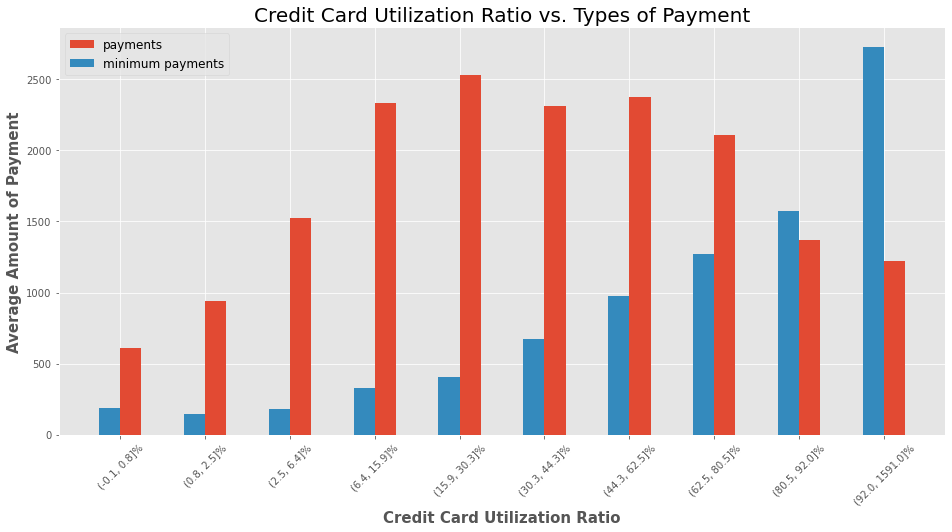

In [21]:
chart_df = cc.groupby('cc_utilization_tile', as_index=False).mean()[['cc_utilization_tile','PAYMENTS', 'MINIMUM_PAYMENTS']]

label_x = chart_df['cc_utilization_tile'].astype(str) +'%'
index = np.arange(len(label_x))
width = 0.25
fig, ax = plt.subplots(figsize=[13.33, 7.5])

bar1 = ax.bar(index+width/2, chart_df['PAYMENTS'], width, label= 'payments')
bar2 = ax.bar(index-width/2, chart_df['MINIMUM_PAYMENTS'], width, label='minimum payments')


plt.xlabel('Credit Card Utilization Ratio', fontsize = 15, fontweight='bold')
plt.ylabel('Average Amount of Payment', fontsize = 15, fontweight='bold')
plt.xticks(index, labels=label_x, rotation=45)
plt.title('Credit Card Utilization Ratio vs. Types of Payment', fontsize=20)
plt.legend(fontsize=12)

plt.tight_layout()
#plt.savefig('graphs/cc utilization vs payments', dpi=300)
plt.show()

What stands out is that the highest two bins have high average minimum payments and the minimum payments exceed regular payments. In the case of the most extreme bin, the minimum average payment more than doubles payments. Most likely, users with extremely high credit card utilization ratios are unable to pay off their balance, which leads to a situation where they can only afford minimum payments.

In [22]:
print(cc[cc['cc_utilization'] > 100].shape[0] / cc.shape[0])
cc[cc['cc_utilization'] > 100]

0.02536312849162011


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10006   1809.828751                1.0    1333.28               0.0   
C10011   1293.124939                1.0     920.12               0.0   
C10021   2016.684686                1.0     176.68               0.0   
C10067   1923.886805                1.0    1887.64               0.0   
C10082   1205.716678                1.0       0.00               0.0   
...              ...                ...        ...               ...   
C18823   1283.337407                1.0    1022.41             171.6   
C18848   1182.080141                1.0     266.68               0.0   
C18858   1012.089680                1.0     312.48               0.0   
C18961   3002.791004                1.0    2463.00            2463.0   
C19114   1023.883008                1.0     585.84               0.0   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10006                  1333.28      0.000000             0.666667   
C10011                   920.12      0.000000             1.000000   
C10021                   176.68      0.000000             0.666667   
C10067                  1887.64   1605.949371             1.000000   
C10082                     0.00     38.325801             0.000000   
...                         ...           ...                  ...   
C18823                   850.81   1158.035224             0.875000   
C18848                   266.68    848.848179             0.666667   
C18858                   312.48      0.000000             1.000000   
C18961                     0.00    797.158950             0.166667   
C19114                   585.84    956.849209             1.000000   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10006                     0.000000                          0.583333   
C10011                     0.000000                          1.000000   
C10021                     0.000000                          0.666667   
C10067                     0.000000                          1.000000   
C10082                     0.000000                          0.000000   
...                             ...                               ...   
C18823                     0.125000                          0.750000   
C18848                     0.000000                          0.666667   
C18858                     0.000000                          1.000000   
C18961                     0.166667                          0.000000   
C19114                     0.000000                          0.875000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10006                 0.000000                 0              8   
C10011                 0.000000                 0             12   
C10021                 0.000000                 0              8   
C10067                 0.083333                 4             61   
C10082                 0.083333                 1              0   
...                         ...               ...            ...   
C18823                 0.250000                 5             16   
C18848                 0.083333                 6              8   
C18858                 0.000000                 0             12   
C18961                 0.166667                 3              3   
C19114                 0.125000                 2             22   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CUST_ID                                                                  
C10006         1800.0  1400.057770       2407.246035          0.000000   
C10011         1200.0  1083.301007       2172.697765          0.000000   
C10021         2000.0   223.068600

Interesting, there are a few credit card users who go beyond 100% of their credit card utilization. These people are at risk of defaulting and are candidates who potentially require deactivation of their cards. Looking into this issue is beyond the scope of this notebook, but the company should take a deeper look at these individuals. 

### Heatmap

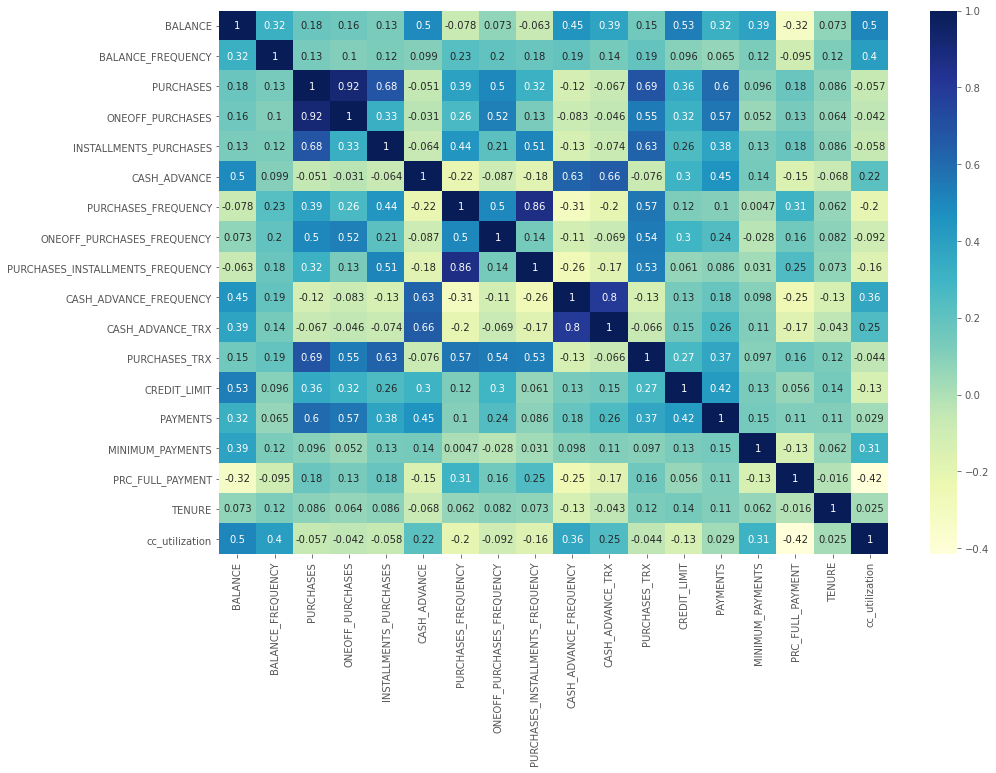

In [23]:
plt.figure(figsize=[15,10])
sns.heatmap(cc.corr(), annot=True, cmap='YlGnBu')
plt.show()

We have a few variables that are highly correlated with each other. Of particular note are the pairwise correlations between:
- `ONEOFF_PURCHASES` and `PURCHASES`
- `PURCHASES_FREQUENCY` and `PURCHASES_INSTALLMENTS_FREQUENCY`
- `CASH_ADVANCE_FREQUENCY` and `CASH_ADVANCE_TRX`

We will handle the multicollinearity later using Principal Component Analysis. It is also worth mentioning that multicollinearity is only a significant problem for regression analysis and less so for clustering. Therefore, we will not drop any columns for clustering. See [here](https://www.quora.com/What-happens-when-you-pass-correlated-variables-to-a-k-means-clustering-Also-is-there-a-way-by-which-clustering-can-be-used-to-group-similar-pattern-observed-for-a-variable-over-time) or [here](https://stats.stackexchange.com/questions/62253/do-i-need-to-drop-variables-that-are-correlated-collinear-before-running-kmeans) for more information.

### Save Clean Dataset

In [24]:
cc.drop(['cc_utilization_tile'],axis=1, inplace=True) # drop this column as we will not need it for further analysis

In [25]:
# change back credit card utilization from percent to decimals
cc['cc_utilization'] = cc['cc_utilization'] / 100

In [26]:
cc.to_csv('data/clean_dataset.csv')

# Preprocessing, Modeling, and Visualizations

## Scaling

In [27]:
scale = StandardScaler()
X = np.array(cc)
X = scale.fit_transform(X)

## KMEANs

K-means forms clusters by calculating the distance of each instance within a cluster to its centroid.Those distances are squared, and then summed. This is repeated for all clusters and the totals sums for each cluster are summed together to output what is known as the within-cluster sum of squares, or  alternatively as inertia. The goal is to minimize the inertia, which is our loss function. Increasing the number of clusters ($k$) will naturally minimize the inertia; hypothetically, if we set $k$ = the number of instances ($n$), the inertia would equal zero; however, at a certain point, increasing $k$ would not serve any practical business purpose as having $k$ approach $n$ offers us no insight into our credit card users. A high $k$ would make it difficult for the company to target its credit card users with the appropriate marketing material and information as it would have too many target customer segments to work with. So how do we choose the correct number of clusters? We will explore two methods for choosing $k$: the "elbow method" and the "silhouette method."

**Note:** clustering is inherently subjective as it is after all an unsupervised learning technique. We do not have any labels to help train and test our model.

In [28]:
K_range = range(2, 20)
assignments = {}
wcss = []

for K in K_range:
    model = KMeans(n_clusters=K, random_state=42)
    model.fit(X)
    wcss.append(model.inertia_)

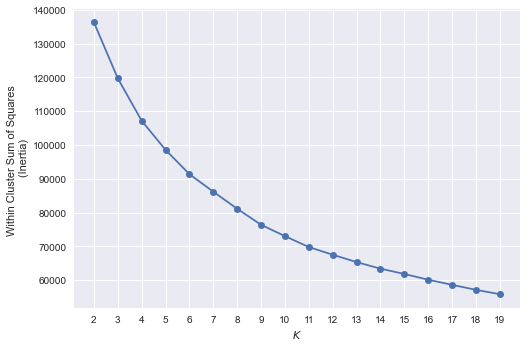

In [29]:
plt.style.use('seaborn')

plt.plot(K_range, wcss, marker='o')
plt.xticks(K_range)
plt.xlabel('$K$')
plt.ylabel('Within Cluster Sum of Squares \n (Inertia)')
plt.savefig('graphs/initial elbow plot', dpi=300)
plt.show()

It is difficult to determine from the plot the best value of $K$ as there is not a clear "elbow". 5-7 clusters might be a good number. Let's try the silhouette method to see if we can get a clearer value for $K$

**Silhouette Method**

The silhouette method uses what is know as a silhouette coefficient to determine the best number of clusters. The silhouette coefficient has values ranging from 0 to 1

For n_clusters = 2 The average silhouette_score is : 0.19662325943112008
For n_clusters = 3 The average silhouette_score is : 0.18010196196897865
For n_clusters = 4 The average silhouette_score is : 0.18207045725374707
For n_clusters = 5 The average silhouette_score is : 0.18748401696493405
For n_clusters = 6 The average silhouette_score is : 0.19458034434827598
For n_clusters = 7 The average silhouette_score is : 0.203389443504429
For n_clusters = 8 The average silhouette_score is : 0.21004100872032463
For n_clusters = 9 The average silhouette_score is : 0.21460323570785944
For n_clusters = 10 The average silhouette_score is : 0.2079042232117908
For n_clusters = 11 The average silhouette_score is : 0.20211229497142202
For n_clusters = 12 The average silhouette_score is : 0.19936090185347355
For n_clusters = 13 The average silhouette_score is : 0.2031104776407701
For n_clusters = 14 The average silhouette_score is : 0.17206139284889782
For n_clusters = 15 The average silhouette_score i

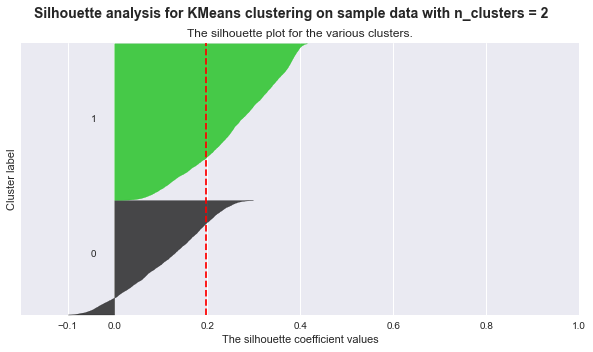

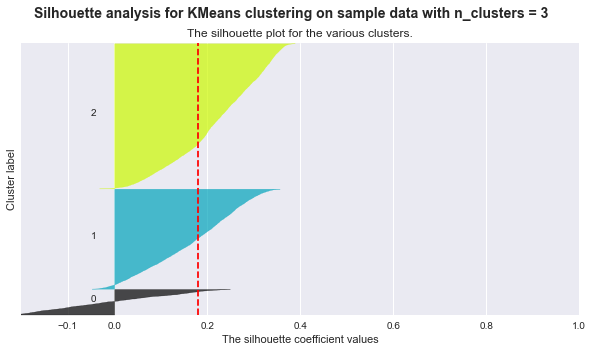

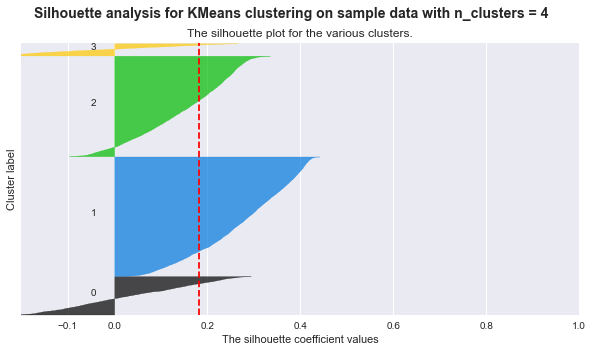

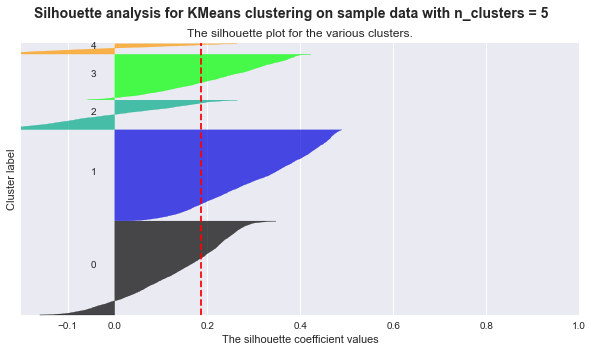

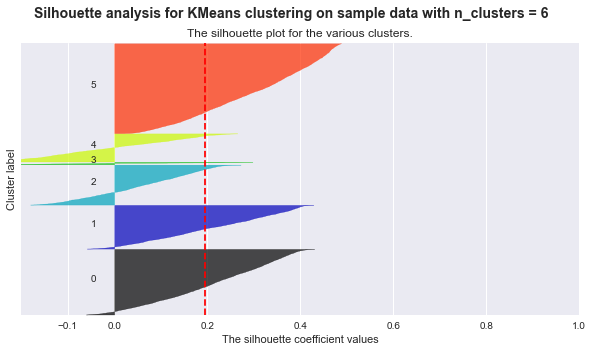

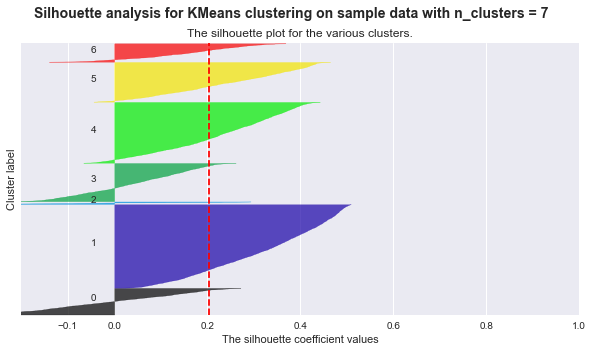

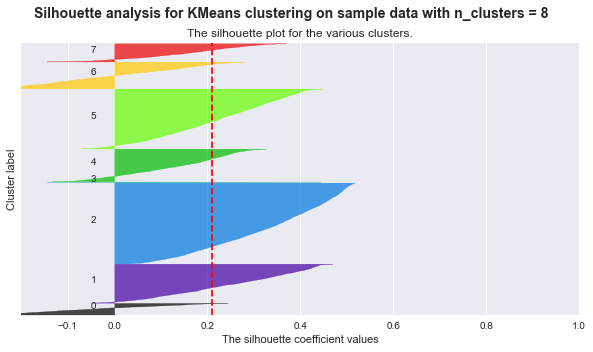

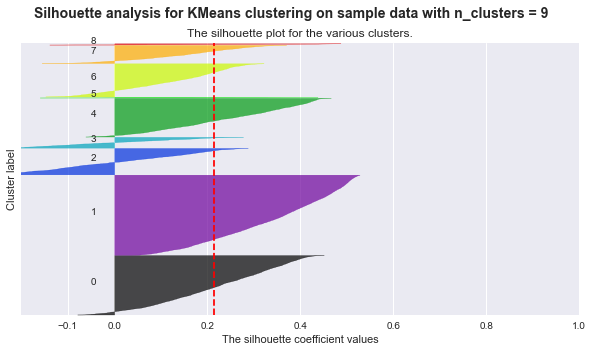

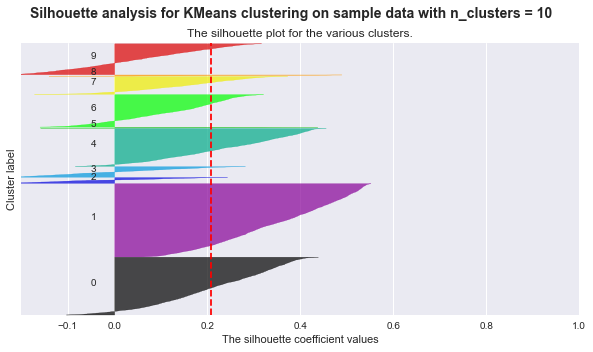

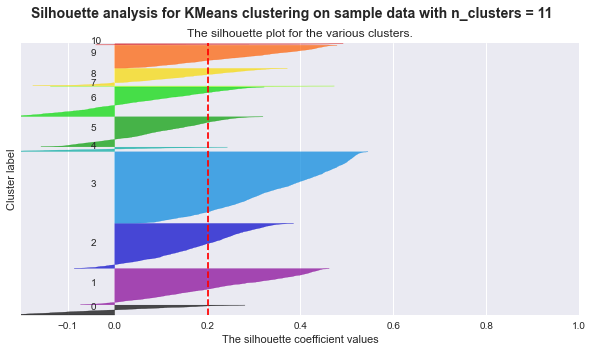

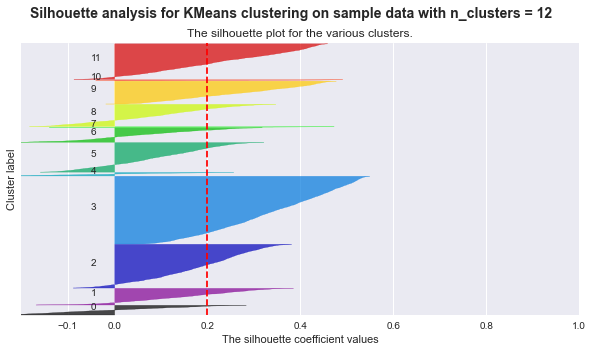

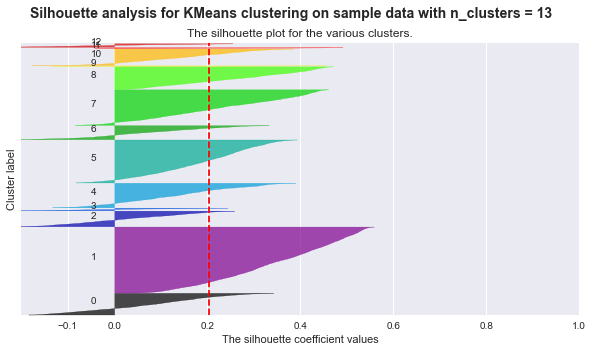

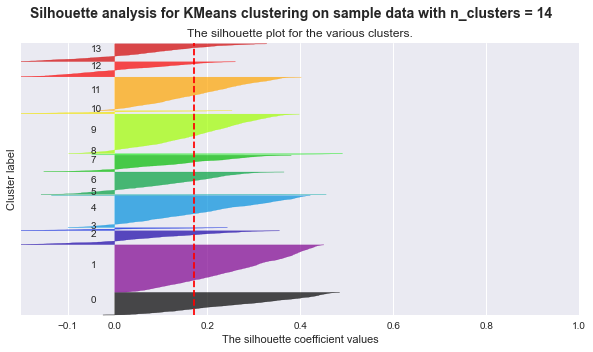

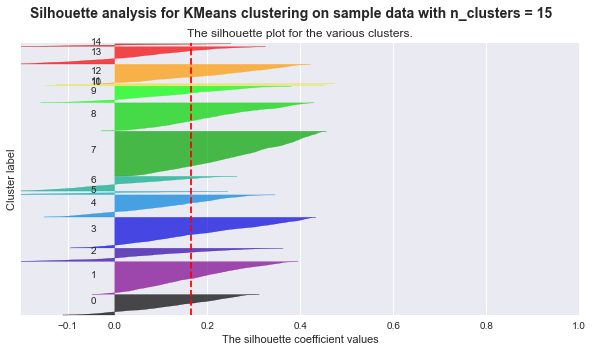

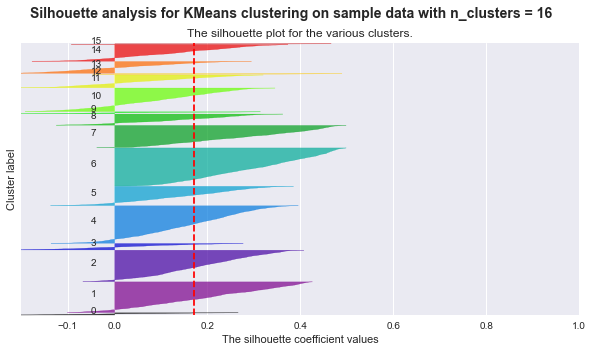

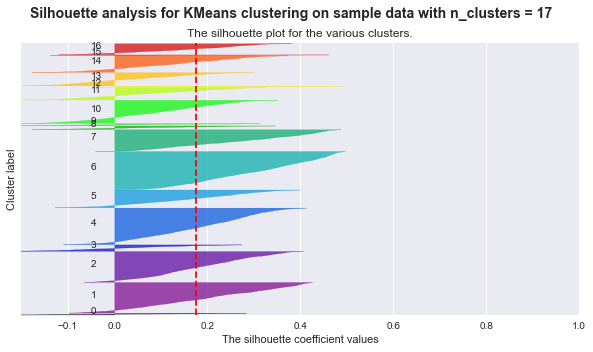

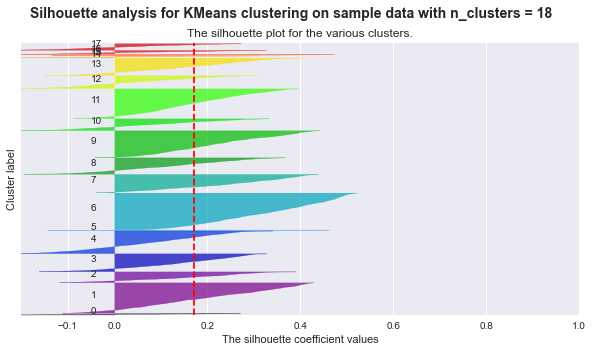

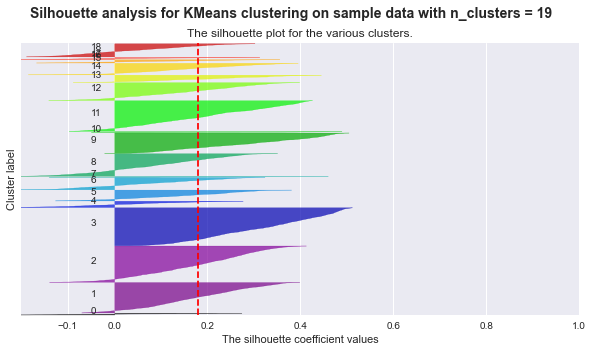

In [30]:
'''
Sci-kit learn offers a handy function to the retrieve the silhoutte score. 
The block of code is adapted from a sci-kit learn article on selecting the number of clusters
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
'''
avg_silhouette_scores = []

for n_clusters in K_range:
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(10, 5)
    
     # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1)* 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    avg_silhouette_scores.append(silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

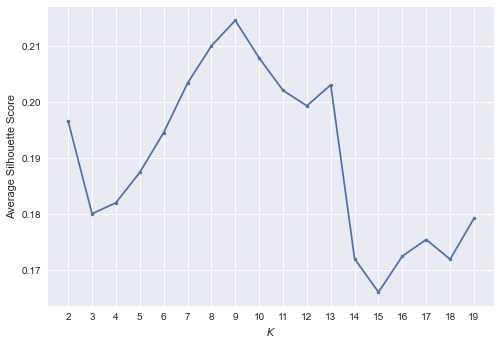

In [31]:
plt.plot(K_range, avg_silhouette_scores, marker='.')
plt.xlabel('$K$')
plt.ylabel('Average Silhouette Score')
plt.xticks(K_range)
plt.savefig('graphs/initial silhouette scores', dpi=300)
plt.show()

There are not huge differences between the average silhouette scores for different numbers of clusters. Let's set `K = 6` for now as creating profiles for more than that could prove troublesome and less useful

In [32]:
K = 6

model = KMeans(n_clusters=K, random_state=42)
cluster_labels = model.fit_predict(X)

In [33]:
cc['clusters']= cluster_labels
cc.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10004   1666.670542           0.636364    1499.00           1499.00   
C10005    817.714335           1.000000      16.00             16.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                     95.4      0.000000             0.166667   
C10002                      0.0   6442.945483             0.000000   
C10003                      0.0      0.000000             1.000000   
C10004                      0.0    205.788017             0.083333   
C10005                      0.0      0.000000             0.083333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CUST_ID                                                                  
C10001         1000.0   201.802084        139.509787          0.000000   
C10002         7000.0  4103.032597       1072.340217          0.222222   
C10003         7500.0   622.066742        627.284787          0.000000   
C10004         7500.0     0.000000          0.000000          0.000000   
C10005         1200.0   678.334763        244.791237          0.000000   

         TENURE  cc_utilization  clusters  
CUST_ID                                    
C10001       12        0.040901         1  
C10002       12        0.457495         4  
C10003       12        0.332687         2  
C10004       12        0.222223         1  
C10005       12        0.681429         5

# PCA

Principal Component Analysis is a useful tool for visualization purposes. It allows for easy visualions of high dimensional data into 2 or 3 principal components. It does so by reducing the dimension through creating new independent features that are linear combinations of the old features. The downside is it does affect interpretability. In this notebook, we will utilize PCA for visualizing our customers in 2 and 3 dimensions. 

**Scree Plot**

In [34]:
pca = PCA()
pca.fit(X)

PCA()

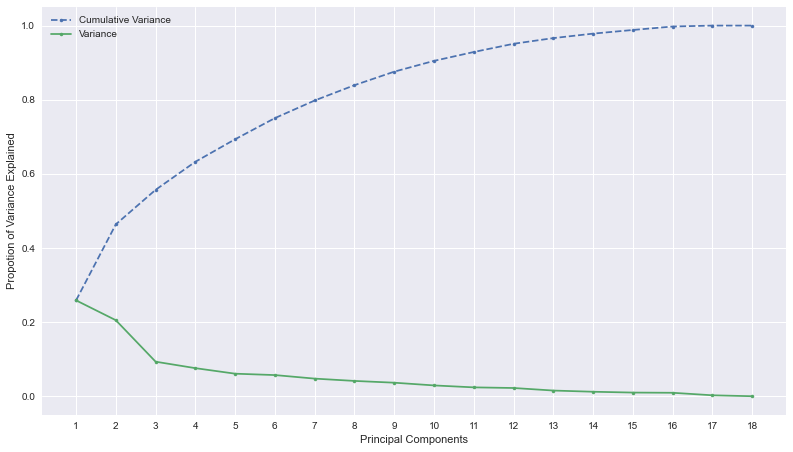

In [35]:
plt.figure(figsize =[13.33, 7.5])

plt.plot(range(1, X.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), marker='.', linestyle='--',label='Cumulative Variance')
plt.plot(range(1, X.shape[1]+1), pca.explained_variance_ratio_, marker='.', label='Variance')

plt.legend()
plt.xlabel('Principal Components')
plt.ylabel('Propotion of Variance Explained')
plt.xticks(range(1, X.shape[1]+1))
plt.savefig('graphs/initial scree plot', dpi=300)
plt.show()

The steepest drops are from 1 to 2 and 2 to 3. We will visualize our data using both 2 and 3 prinicipal components

### PCA Visualization in 2-D

In [36]:
np.unique(cluster_labels)

array([0, 1, 2, 3, 4, 5])

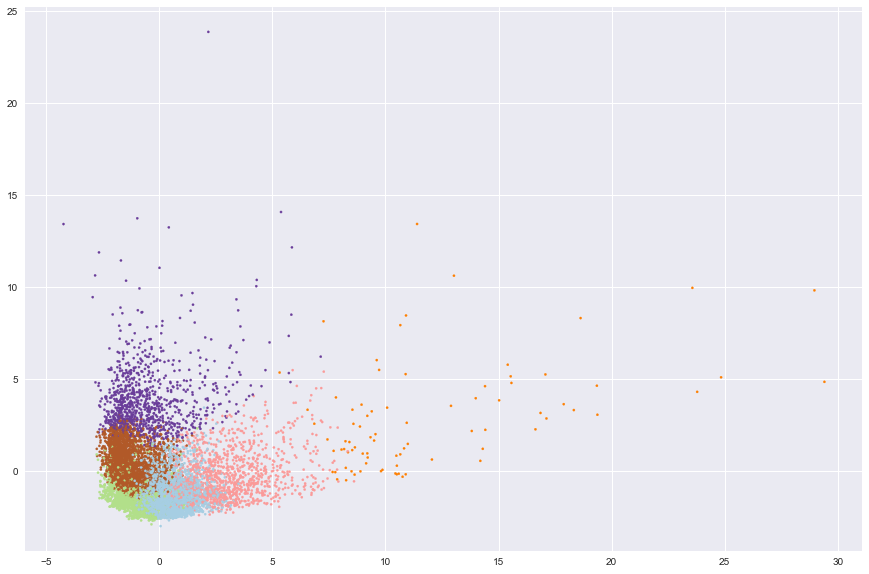

In [37]:
pca = PCA(n_components=2)
pca_transform = pca.fit_transform(X)
pc1, pc2 = zip(*pca_transform)

plt.figure(figsize=[15,10])
plt.scatter(pc1, pc2, c=cluster_labels, cmap='Paired', s=5)
plt.savefig('graphs/initial 2d pca', dpi=300)
plt.show()

### PCA Visualization in 3-D

In [38]:
#PCA
pca = PCA(n_components=3)
pca_transform = pca.fit_transform(X) #transformed features
pc1, pc2, pc3 = zip(*pca_transform) # unpack principal components

df_plot = pd.DataFrame({'pc1': pc1, 'pc2':pc2, 'pc3':pc3, 'cluster_labels':cluster_labels})


In [39]:
df_plot['cluster_labels'] = df_plot['cluster_labels'].astype('category')

In [40]:
fig = px.scatter_3d(df_plot, x='pc1', y='pc2', z='pc3', color='cluster_labels', 
                    opacity=0.5,hover_name='cluster_labels', color_discrete_sequence=px.colors.qualitative.Dark2, 
                    category_orders={'cluster_labels':[i for i in np.arange(K)]},
                    title='3-D Vizualization of Principal Components',            
                   )

fig.update_traces(marker=dict(size=3.5,))

fig.show()

**Cosine Similarity**
We can further improve the visualization by using cosine similarity. Cosine similarity is helpful because it focuses on the orientation(direction) of a vector and not the magnitude. Thus, observations are evaluated on a similarity criteria different than pure euclidean distance. We can transform by our values by subtracting cosine_similarity from 1 to get the distance. Our visualization will turn resemble a round ball

In [41]:
distance = 1 - cosine_similarity(X) #Computes pairwsie similarities bewteen all samples in X

#PCA
pca = PCA(n_components=3)
pca_transform = pca.fit_transform(distance) #transformed features
pc1, pc2, pc3 = zip(*pca_transform) # unpack principal components

# df: PCs and cluster label
df_plot = pd.DataFrame({'pc1': pc1, 'pc2':pc2, 'pc3':pc3, 'cluster_labels':cluster_labels})

In [42]:
df_plot['cluster_labels'] = df_plot['cluster_labels'].astype('category')

In [43]:
fig = px.scatter_3d(df_plot, x='pc1', y='pc2', z='pc3', color='cluster_labels', 
                    opacity=0.5,hover_name='cluster_labels', color_discrete_sequence=px.colors.qualitative.Dark2, 
                    category_orders={'cluster_labels':[i for i in np.arange(K)]},
                    title='3-D Vizualization of Principal Components',            
                   )

fig.update_traces(marker=dict(size=3.5,))

fig.show()